<a href="https://colab.research.google.com/github/GstavRocha/DataAlanlise/blob/main/Atividade_Fontoura_Mega_Sena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade Analise de Dados
## Docente Gustavo Fontoura
### Discente Gustavo Rocha
* matricula: 20211148060008, TSI Verpertino

**Resolução** de problemas propostos:
1. Quais os números mais sorteados?
2. Qual é o tempo médio entre concursos que apresentam ganhadores?
3. Qual é a frequência de ganhadores por estado?
4. Qual é o valor do premio médio pago por concurso? e pago por ganhador?
5. Qual é o estado que recebeu o maior premio?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MEGASENA.csv')
df.head()


,Concurso,Data do Sorteio,Bola1,Bola2,Bola3,Bola4,Bola5,Bola6,Ganhadores 6 acertos,Cidade / UF,Rateio 6 acertos,Ganhadores 5 acertos,Rateio 5 acertos,Ganhadores 4 acertos,Rateio 4 acertos,Acumulado 6 acertos,Arrecadação Total,Estimativa prêmio,Acumulado Sorteio Especial Mega da Virada,Observação
0,1,11/03/1996,4,5,30,33,41,52,0,NaN,"R$0,00",17,"R$39.158,92",2016,"R$330,21","R$1.714.650,23","R$0,00","R$0,00","R$0,00",NaN
1,2,18/03/1996,9,37,39,41,43,49,1,PR,"R$2.307.162,23",65,"R$14.424,02",4488,"R$208,91","R$0,00","R$0,00","R$0,00","R$0,00",NaN
2,3,25/03/1996,10,11,29,30,36,47,2,RN; SP,"R$391.192,51",62,"R$10.515,93",4261,"R$153,01","R$0,00","R$0,00","R$0,00","R$0,00",NaN
3,4,01/04/1996,1,5,6,27,42,59,0,NaN,"R$0,00",39,"R$15.322,24",3311,"R$180,48","R$717.080,75","R$0,00","R$0,00","R$0,00",NaN
4,5,08/04/1996,1,2,6,16,19,46,0,NaN,"R$0,00",98,"R$5.318,10",5399,"R$96,53","R$1.342.488,85","R$0,00","R$0,00","R$0,00",NaN


In [ ]:
numeros_sorteados = df[['Bola1', 'Bola2', 'Bola3', 'Bola4', 'Bola5', 'Bola6']].values.flatten()
numeros_sorteados = numeros_sorteados[~pd.isnull(numeros_sorteados)]
contagem_de_numeros = Counter(numeros_sorteados)
top_numeros = contagem_de_numeros.most_common(25)
for numeros, contagem in top_numeros:
    print(f"Numeros {numeros} foi sorteado {contagem} vezes.")

Numeros 10 foi sorteado 328 vezes.
Numeros 53 foi sorteado 319 vezes.
Numeros 34 foi sorteado 303 vezes.
Numeros 5 foi sorteado 302 vezes.
Numeros 37 foi sorteado 300 vezes.
Numeros 33 foi sorteado 299 vezes.
Numeros 42 foi sorteado 298 vezes.
Numeros 23 foi sorteado 298 vezes.
Numeros 30 foi sorteado 297 vezes.
Numeros 35 foi sorteado 297 vezes.
Numeros 44 foi sorteado 297 vezes.
Numeros 38 foi sorteado 296 vezes.
Numeros 41 foi sorteado 295 vezes.
Numeros 11 foi sorteado 294 vezes.
Numeros 32 foi sorteado 294 vezes.
Numeros 4 foi sorteado 293 vezes.
Numeros 17 foi sorteado 293 vezes.
Numeros 27 foi sorteado 292 vezes.
Numeros 43 foi sorteado 291 vezes.
Numeros 16 foi sorteado 289 vezes.
Numeros 46 foi sorteado 289 vezes.
Numeros 56 foi sorteado 289 vezes.
Numeros 28 foi sorteado 289 vezes.
Numeros 13 foi sorteado 286 vezes.
Numeros 54 foi sorteado 286 vezes.


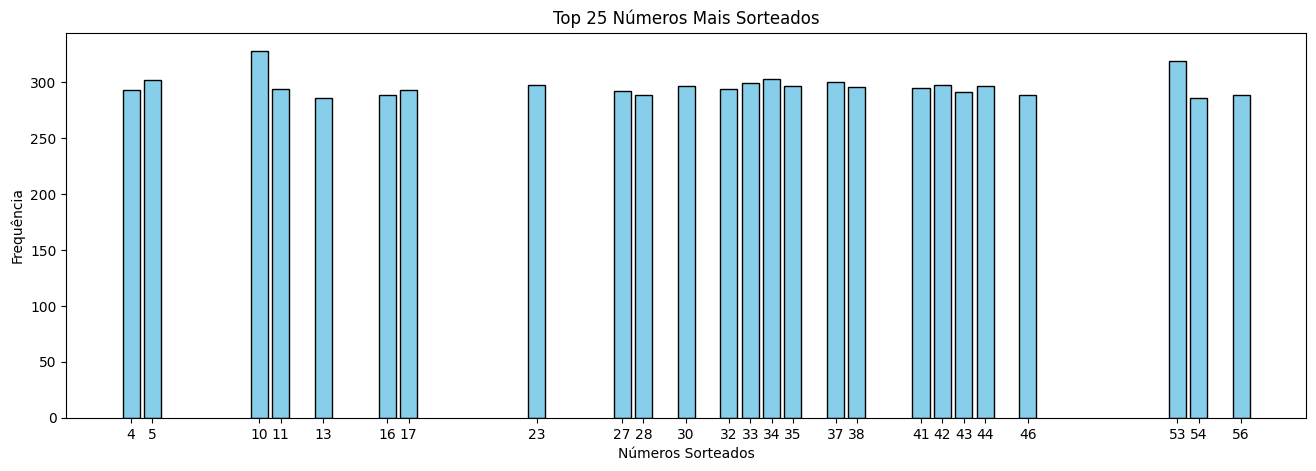

In [ ]:
numeros_sorteados = df[['Bola1', 'Bola2', 'Bola3', 'Bola4', 'Bola5', 'Bola6']].values.flatten()
numeros_sorteados = numeros_sorteados[~pd.isnull(numeros_sorteados)]
contagem_de_numeros = Counter(numeros_sorteados)
top_numeros = contagem_de_numeros.most_common(25)  # Top 25 números mais sorteados
numeros, frequencia = zip(*top_numeros)
plt.figure(figsize=(16,5))
plt.bar(numeros, frequencia, color='skyblue', edgecolor='black')
plt.xlabel('Números Sorteados')
plt.ylabel('Frequência')
plt.title('Top 25 Números Mais Sorteados')
plt.xticks(numeros)
plt.show()

### 2. Qual é o tempo médio entre concursos que apresentam ganhadores?
* considerando ganhadores apenas os que fizeram sena, ou seja acertaram 6 bolas que é o prêmio máximo do sorteio.

In [ ]:
df_Tempo_Médio = pd.DataFrame({
    'ganhadores': df['Ganhadores 6 acertos'],
    'Sorteio': df['Data do Sorteio'],
    '6Bolas': df['Bola6']
})
df_Tempo_Médio.Sorteio
df_Tempo_Médio['Sorteio'] = pd.to_datetime(df_Tempo_Médio['Sorteio'], format='%d/%m/%Y', errors='coerce')
ganhadores = df_Tempo_Médio[df_Tempo_Médio['ganhadores'] > 0].sort_values('Sorteio')
diferença  = ganhadores['Sorteio'].diff().dropna()
tempo_medio = diferença.mean()
tempo_medio

Timedelta('16 days 21:37:38.022690437')

### 3. Qual é a frequência de ganhadores por estado?

In [ ]:
df_estados = df[['Cidade / UF', 'Ganhadores 6 acertos']].dropna()
df_estados = df_estados[df_estados['Ganhadores 6 acertos'] > 0]
estados = df_estados['Cidade / UF'].str.split(';').explode()
frequencia_estados = Counter(estados)
df_frequencia_estados = pd.DataFrame(frequencia_estados.items(), columns=['Estado', 'Frequência']).sort_values(by='Frequência', ascending=False)
df_frequencia_estados.head(100)

,Estado,Frequência
4,SP,41
318,CANAL ELETRONICO,31
2,SP,29
44,RIO DE JANEIRO/RJ,27
6,MG,25
...,...,...
30,PE,2
61,SANTA RITA DO PASSA QUATRO/SP,2
50,PORTO ALEGRE/RS,2
374,BOM DESPACHO/MG,1


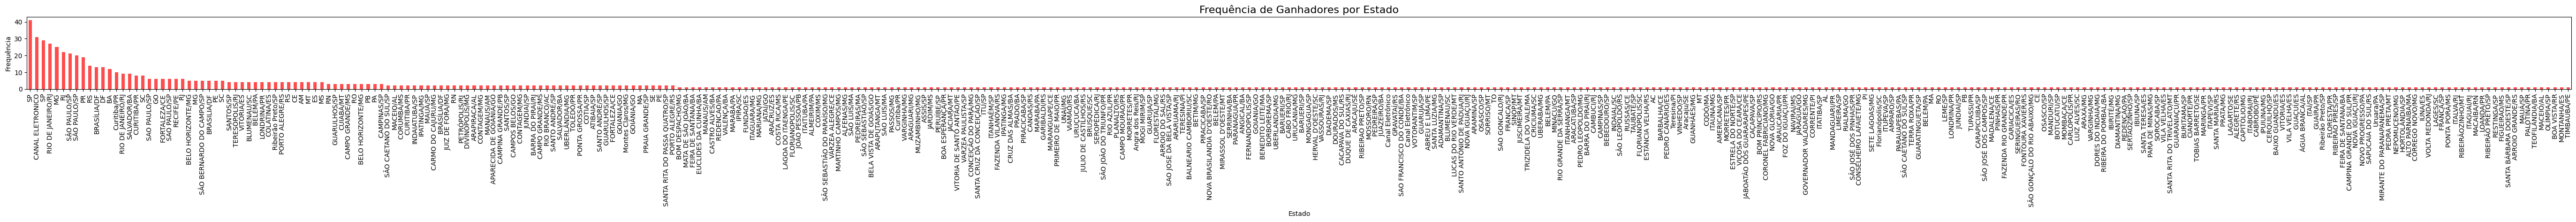

In [ ]:
plt.figure(figsize=(70,2))
df_frequencia_estados.set_index('Estado')['Frequência'].plot(kind='bar', color='red', alpha=0.7)
plt.title("Frequência de Ganhadores por Estado", fontsize=16)
plt.xlabel("Estado")
plt.ylabel("Frequência")
plt.show()